## Holt Winters method

In [1]:
import pandas as pd, numpy as np
import warnings
warnings.filterwarnings('ignore')

#### Reading dataset

In [2]:
df= pd.read_csv("E:/Python WD/time_series/data/Work Data - Sheet1.csv")


#### Defining parameters for time series analysis

In [3]:
#define columns
df.columns
time_series_index= 'obs'
forecast_variable= 'FTCORTCS'
additional_variables= ['EEA', 'UYCD', 'FNNF', 'FYPTY', 'JGDPMTPR', 'UFCORPTS',
       'UFSNPEPS', 'YPPROPADJNF', 'ZB']

frequency= 'Q'
train_test_split= .2
forecast_points= 8
n_test= 8
output_length= 8


#### Preparing data as per specified parameters

In [4]:
#prepare data
#set datetime index column
df[time_series_index]= pd.to_datetime(df[time_series_index])
df= df.set_index(time_series_index)

df= df[df.index<='2019Q3']

#bring forecast variable column at index 0 
df= pd.concat([df[[forecast_variable]],df.drop(columns=forecast_variable)], axis=1)

#### Train test split

In [5]:
n_test= n_test # 8 quarters in test data<-- make it 0 to forecast
n_train= df.shape[0]-n_test

train_df= df[:n_train]
test_df= df[-n_test:]


output_length= output_length
#train length: taking train
train_length= round(1.5*output_length)

#### Visualizing the data

Text(0.5, 1.0, 'plot of 3 year rolling mean')

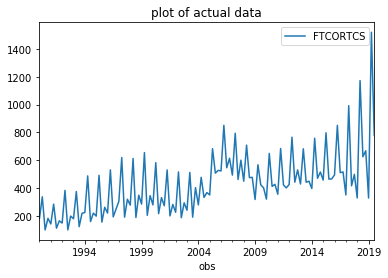

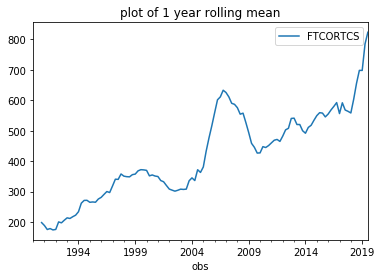

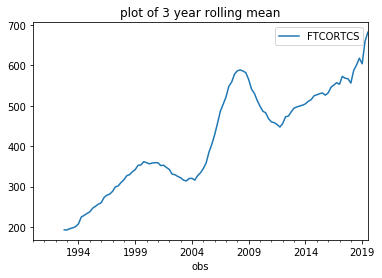

In [8]:
import matplotlib.pyplot as plt
df[[forecast_variable]].plot()
plt.title('plot of actual data')

df[[forecast_variable]].rolling(4).mean().plot()
plt.title('plot of 1 year rolling mean')
df[[forecast_variable]].rolling(12).mean().plot()
plt.title('plot of 3 year rolling mean')


#### Model fitting

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
model = HWES(train_df[forecast_variable], seasonal_periods=4, trend='add', seasonal='mul', freq='QS')
fitted = model.fit()
print(fitted.summary())



                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  111
Model:             ExponentialSmoothing   SSE                         330658.984
Optimized:                         True   AIC                            903.924
Trend:                         Additive   BIC                            925.600
Seasonal:                Multiplicative   AICC                           906.124
Seasonal Periods:                     4   Date:                 Sun, 25 Oct 2020
Box-Cox:                          False   Time:                         08:25:39
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3138573                alpha                 True
smoothing_slope          

In [12]:
sales_forecast = pd.DataFrame(fitted.forecast(steps=output_length))
actual_predicted_df= df[df.index<='2019-09-30'][[forecast_variable]]
actual_predicted_df= pd.merge(actual_predicted_df,sales_forecast, how='outer',left_index =True, right_index=True )
actual_predicted_df= actual_predicted_df.rename(columns= {forecast_variable:'actual',0:'predicted'})
actual_predicted_df.index.name='ds'
actual_predicted_df_wide= actual_predicted_df.reset_index().melt(id_vars=['ds'], value_vars=['actual','predicted'], var_name='actual/predicted', value_name='value' )

#### visualizing the output

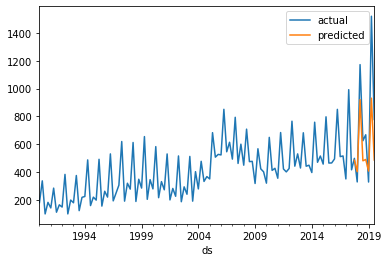

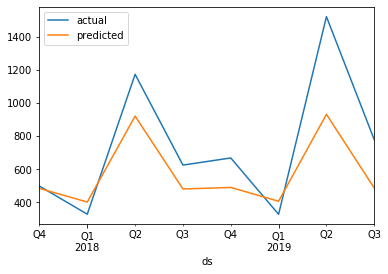

In [13]:
actual_predicted_df.plot()
actual_predicted_df[actual_predicted_df.index>='2017Q4'].plot()

#### Computing performance

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from numpy import math
metrics= pd.read_csv('E:/Python WD/time_series/data/metrics.csv', index_col='Unnamed: 0')
metrics.loc['mean absolute error', 'holt winters']= mean_absolute_error(actual_predicted_df[-8:].actual, actual_predicted_df[-8:].predicted)
metrics.loc['mean squared error', 'holt winters']= math.sqrt(mean_squared_error(actual_predicted_df[-8:].actual, actual_predicted_df[-8:].predicted))
metrics.to_csv('E:/Python WD/time_series/data/metrics.csv')
metrics

,ARIMA,holt winters
mean squared error,259.930480,264.855497
mean absolute error,205.418661,202.861790


#### Predicting next 10 years data

In [33]:
model = HWES(df[forecast_variable], seasonal_periods=4, trend='add', seasonal='mul', freq='QS')
fitted = model.fit()
print(fitted.summary())

prediction_length= 40
forecasts = pd.DataFrame(fitted.forecast(steps=prediction_length))


predictions= pd.read_csv('E:/Python WD/time_series/data/predictions.csv', index_col= 'Unnamed: 0')
predictions.loc[:, 'holt winters']= forecasts.values
predictions
predictions.to_csv('E:/Python WD/time_series/data/predictions.csv')



                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  119
Model:             ExponentialSmoothing   SSE                         505740.341
Optimized:                         True   AIC                           1010.204
Trend:                         Additive   BIC                           1032.437
Seasonal:                Multiplicative   AICC                          1012.241
Seasonal Periods:                     4   Date:                 Sun, 25 Oct 2020
Box-Cox:                          False   Time:                         08:30:12
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.2700645                alpha                 True
smoothing_slope          